## 3.1 Churn prediction Project 

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 3.2 Data preparation 

- Download Data
- Look at the data
- Make column names and values look uniform
- Check if all columns read correcty
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#conver column names to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

#convert values of all cols to lowercase
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [5]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [6]:
df.totalcharges = df.totalcharges.fillna(0)

In [7]:
df[df.totalcharges == 0][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [8]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [9]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head()[['churn']]

,churn
0,0
1,0
2,1
3,0
4,1


## 3.3 Setting up the validation framework

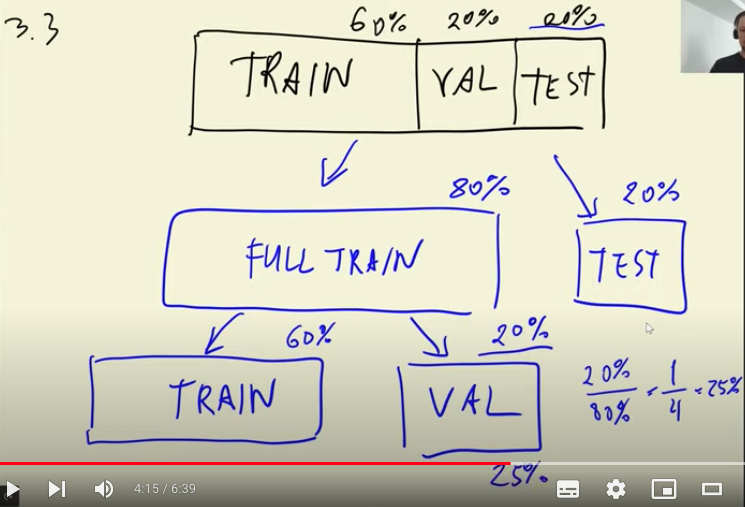

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [13]:
df_train, df_val = train_test_split (df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_full_train), len(df_val), len(df_test)

(5634, 1409, 1409)

In [15]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [16]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

- Missing Values
- Look at the target variable (churn)
- Look at the numerical and categorical variables

In [17]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [18]:
#df_full_train.isnull().sum()

In [19]:
#churn rate (ones). Around 27% of users are churning
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [20]:
#sum of ones divede in n elements

global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [21]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [22]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [23]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feture importance analysis (part EDA) - identifying which features affect our target variable

- Churn Rate
- Risk ratio
- Mutual info - later

#### Churn rate

In [24]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [25]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [26]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [27]:
global_churn_rate - churn_female

-0.006855983216553063

In [28]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [29]:
global_churn_rate-churn_male

0.006754520462819769

In [30]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [31]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

#### Difference

if the difference between: global - group is:

- "< 0", more likely to churn
- "> 0", less likely to churn

In [32]:
global_churn_rate-churn_no_partner

-0.05984095297455855

In [33]:
global_churn_rate-churn_partner

0.06493474245795922

#### Risk Ratio

if the result of group/global is:

- "< 1", less likely to churn
- "> 1", more likely to churn

In [34]:
churn_partner/global_churn_rate

0.7594724924338315

In [35]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [36]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['riskratio'] = df_group['mean']/global_churn_rate
df_group

,mean,count,diff,riskratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [37]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = global_churn_rate - df_group['mean']
df_group['riskratio'] = global_churn_rate / df_group['mean']
df_group

,mean,count,diff,riskratio
gender,,,,
female,0.276824,2796,-0.006856,0.975233
male,0.263214,2838,0.006755,1.025662


In [38]:
from IPython.display import display

In [39]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate 
    df_group['riskratio'] = df_group['mean'] / global_churn_rate 
    display(df_group)

gender


,mean,count,diff,riskratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,riskratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,riskratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,riskratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,riskratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,riskratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,riskratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,riskratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,riskratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,riskratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,riskratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,riskratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,riskratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,riskratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,riskratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,riskratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another. The higher mutual information is, the more we learn about the churn by observing the value of another variable.

We can measure the degree of dependency between a categorical variable and the target variable.

(A way of measure the relative importance of the categorical variables)


In [40]:
from sklearn.metrics import mutual_info_score

In [41]:
#how much we learn from the churn by observing the contract
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [42]:
#how much we learn from the churn by observing the gender
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [43]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [44]:
#apply the function to each one of the categorical variables/series
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

- Correlation coefficient

We measure dependency between a binary target variable (0 and 1) and a numerical variable by applying a classical method from statistics called: Correlation Coefficient. This sometetimes is referred as Pearson's correlation coefficient and it's a value range from -1 to 1.

### Positive correlation: when one variable goes up, the other go up as well.

#### Low correlation

- 0.0 to 0.2: Mean that has low correlation. When one variable increases, only rarely leads to an increase in the other variable

#### Moderate correlation

- 0.2 to 0.5: Means that has moderate correlation. When one variable, increases, sometimes leads to an increase in the other variable

#### High correlation

- 0.6 to 1: Mean that has strong correlation. When one variable increases, almost always (above 0.9)/ often (between 0.6 - 0.9) leads to an increase in the other variable


### Negative correlation: when one variable goes up, the other goes down

#### Low correlation

- 0.0 to 0.2: Mean that has low correlation. When one variable increases, only rarely leads to a decrease in the other variable

#### Moderate correlation

- 0.2 to 0.5: Means that has moderate correlation. When one variable, increases, sometimes leads to a decrease in the other variable

#### High correlation

- 0.6 to 1: Mean that has strong correlation. When one variable increases, almost always (above 0.9) / often (between 0.6 - 0.9) leads to decrease in the other variable

### Zero correlation:

Means **no relationship** between the two variables: They are completely independent.

In [45]:
#we can add .abs(), so we can see the importance order. This way we can
#understand how numerical values affect our target variable "churn".
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [46]:
# if they have stayed within a range of less or two months the more likely they will churn
high_corr_tenure = round(df_full_train[df_full_train.tenure <= 2].churn.mean(),2)

In [47]:
#as we increase the sample from greater tenure, the probability of churning decreases
medium_corr_tenure = round(df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean(),2)

In [48]:
low_corr_tenure = round(df_full_train[df_full_train.tenure > 12].churn.mean(),2)

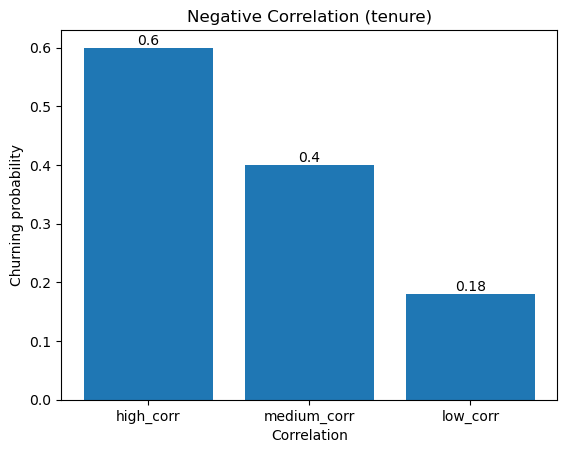

In [49]:
y = [high_corr_tenure, medium_corr_tenure, low_corr_tenure]
x = ['high_corr', 'medium_corr', 'low_corr']
colors = ['green','blue','purple']

fig, ax = plt.subplots()
plt.bar(x, y, color=colors)
plt.title('Negative Correlation (tenure)')
plt.xlabel('Correlation')
plt.ylabel('Churning probability')
data_labels=ax.bar(x, y)
ax.bar_label(data_labels)

plt.show()

In [50]:
# if they have stayed within a range of less or two months the more likely they will churn
high_corr_monthly_chg = round(df_full_train[df_full_train.monthlycharges <= 20].churn.mean(),2)

In [51]:
#as we increase the sample from greater tenure, the probability of churning decreases
med_corr_monthly_chg = round(df_full_train[(df_full_train.monthlycharges < 20) & (df_full_train.tenure <= 50)].churn.mean(),2)

In [52]:
low_corr_monthly_chg = round(df_full_train[df_full_train.monthlycharges > 50].churn.mean(),2)

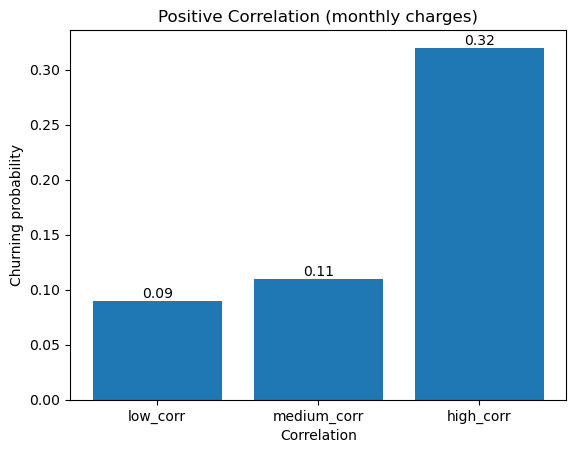

In [53]:
y = [high_corr_monthly_chg, med_corr_monthly_chg, low_corr_monthly_chg]
x = ['low_corr', 'medium_corr', 'high_corr' ]
colors = ['green','blue','purple']

fig, ax = plt.subplots()
plt.bar(x, y, color=colors)
plt.title('Positive Correlation (monthly charges)')
plt.xlabel('Correlation')
plt.ylabel('Churning probability')
data_labels=ax.bar(x, y)
ax.bar_label(data_labels)

plt.show()

## 3.8 One-hot encoding

- Use Scikit-learn to encode categorical features

Convert a categorical variable in a bunch of binary variables. The models deal only with numbers in matrices. We need to convert our categorical data into a matrix form or encode.

One such encoding technique is one-hot encoding.

Example:

If a variable contract has possible values (monthly, yearly, and two-year), we can represent a customer with the yearly contract as (0, 1, 0). In this case, the <u>yearly value is active, or hot, so it gets 1,</u> whereas the remaining values are not active, or cold, so they are 0.

Example:

To understand this better, let’s consider a case with two categorical variables and
see how we create a matrix from them. These variables are:
- gender, with values female and male
- contract, with values monthly, yearly, and two-year

Because the gender variable has only two possible values, we create two columns in the resulting matrix. The contract variable has three columns, and in total, our new matrix will have five columns:
- gender=female
- gender=male
- contract=monthly
- contract=yearly
- contract=two-year

Let’s consider two customers:
- A female customer with a yearly contract
- A male customer with a monthly contract

The matrix representation would be like this:
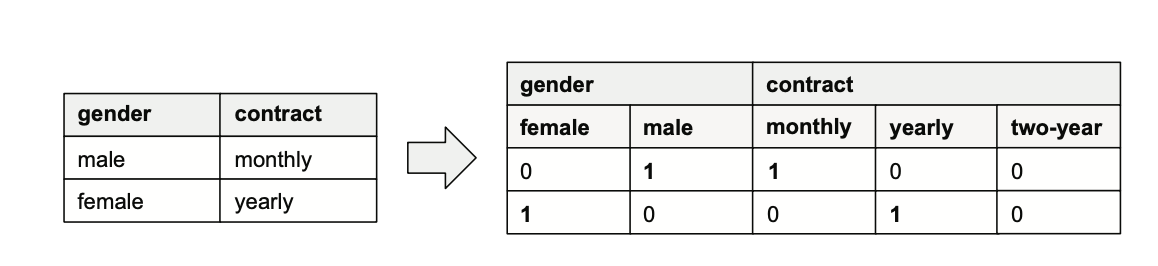

In [54]:
#With DictVectorizer we turn our DataFrame into a bucnh of dictionaries
#then, we fit our dict vectorizer, by showing all the dicts
#and then infers for each variable how to map them to the columns
#in the output matrix, If var is categorical, applies one hot encoding
#if numerical, is left intact

from sklearn.feature_extraction import DictVectorizer

In [55]:
#train_dicts[0]

In [56]:
#sparse matrix: big matrix where most of its elements are zeroes.
#if we have a lot of categorical variables, there will be lots of 0's
dv = DictVectorizer(sparse=False)

In [57]:
train_dicts = (df_train[categorical + numerical]).to_dict(orient='records')

In [58]:
#dv.fit(train_dicts)

In [59]:
#five columns: first 3 for contract type, last 2 for gender.
#get the dictionaries and transform it into our feature matrix for training
X_train = dv.fit_transform(train_dicts)

In [60]:
#dv.get_feature_names_out()

In [61]:
val_dicts = (df_val[categorical + numerical]).to_dict(orient='records')

In [62]:
#get the feture matrix for validation dataset
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

- Binary classification
- Linear vs. logistic regression

For binary classifications our target variables can only be 0 (negative) and 1 (positive). The output of logistic regression is probability. In our case the probability that the customer will churn.

to treat the output as a probability, we need to make sure that the predictions of the model always stay between zero and one. We use a special mathematical function for this purpose called sigmoid, and the full formula for the logistic regression model is:

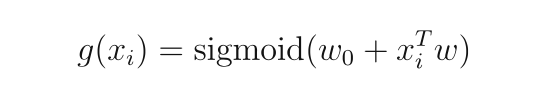

If we compare it with the linear regression formula, the only difference is this sigmoid function: in case of linear regression, we have only w0 + xiTw. This is why both of these models are linear; they are both based on the dot product operation.

Logistic regression is also a linear model, but unlike linear regression, it’s a clas- sification model, not regression, even though the name might suggest that. It’s a binary classification model, so the target variable yi is binary; the only values it can have are zero and one.

The sigmoid function outputs values that are always between 0 (negative examples) and 1 (positive examples). When the input is 0, the result of sigmoid is 0.5; for negative values, the results are below 0.5 and start approaching 0 for input values less than –6. When the input is positive, the result of sigmoid is above 0.5 and approaches 1 for input values starting from 6.

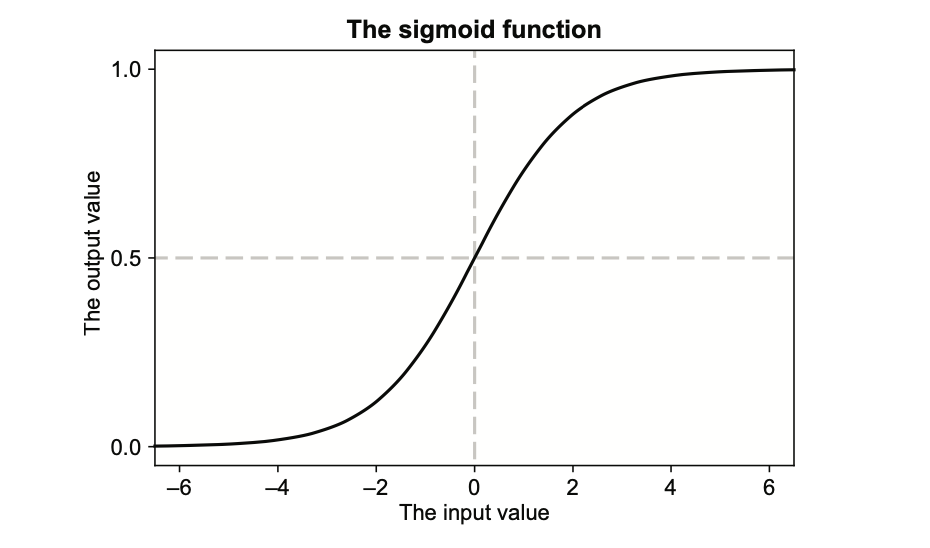


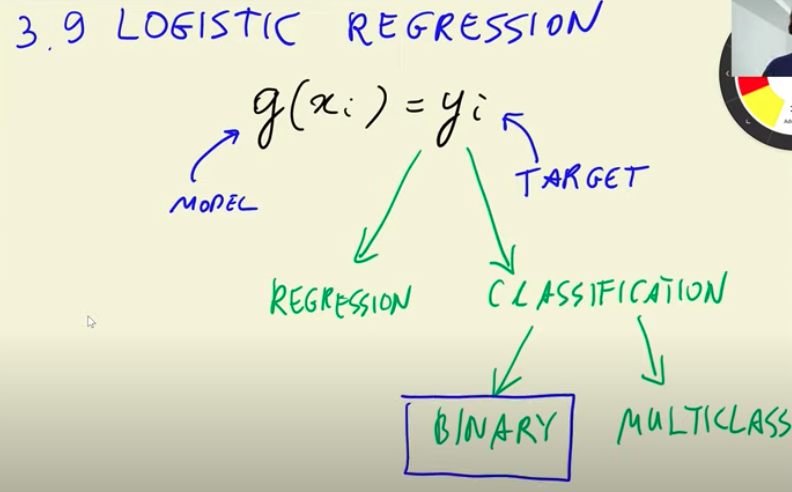

In [63]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [64]:
z = np.linspace(-7,7,51)

In [65]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

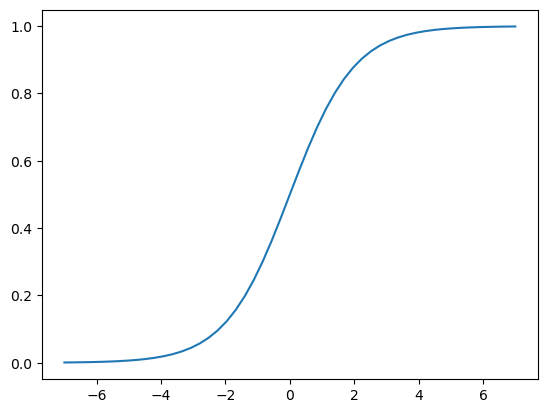

In [66]:
plt.plot(z, sigmoid(z))

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

/usr/local/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
#are our w's
model.coef_[0]

array([ 4.75288876e-01, -1.75015452e-01, -4.07902460e-01, -2.95894521e-02,
       -7.80395830e-02,  6.26644292e-02, -8.88134226e-02, -8.14800417e-02,
       -3.42872510e-02, -7.33417841e-02, -3.35585222e-01,  3.16769610e-01,
       -8.88134226e-02,  3.65484992e-03, -2.58151658e-01,  1.41534081e-01,
        8.98854236e-03,  6.25166546e-02, -8.88134226e-02, -8.13322671e-02,
        2.65759008e-01, -8.88134226e-02, -2.84574620e-01, -2.31255632e-01,
        1.23626597e-01, -1.66021205e-01,  5.83921700e-02, -8.70825287e-02,
       -3.20788357e-02,  7.05160765e-02, -5.89837471e-02,  1.41534081e-01,
       -2.49163116e-01,  2.15663789e-01, -1.20550869e-01, -8.88134226e-02,
        1.01735257e-01, -7.10320536e-02, -8.88134226e-02,  5.22164411e-02,
        2.13501442e-01, -8.88134226e-02, -2.32317054e-01, -7.05228898e-02,
        3.83876337e-04])

In [70]:
#is out W0 or bias term
model.intercept_[0]

-0.10898558956876714

In [71]:
#hard predictions (0 - not churn and 1 - churn)
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [72]:
#soft predictions (probabilities)
#first column is negative class (not churn) and second column is positive class (churn)
model.predict_proba(X_val)

array([[0.99103472, 0.00896528],
       [0.79528255, 0.20471745],
       [0.78755199, 0.21244801],
       ...,
       [0.8638301 , 0.1361699 ],
       [0.20031578, 0.79968422],
       [0.16263646, 0.83736354]])

In [73]:
#we are only interested in columns that churns
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00896528, 0.20471745, 0.21244801, ..., 0.1361699 , 0.79968422,
       0.83736354])

In [74]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [75]:
#these are the people that will churn and need to be sent the promotion
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

In [76]:
#how accurate is our model?
y_val, churn_decision.astype(int)

(array([0, 0, 0, ..., 0, 1, 1]), array([0, 0, 0, ..., 0, 1, 1]))

In [77]:
# we compare y_val vs churn_decision and apply it the mean to know
# the accuracy of our model on average
(y_val == churn_decision).mean()

0.8034066713981547

In [78]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['validation'] = y_val
df_pred.tail()

,probability,prediction,validation
1404,0.313298,0,0
1405,0.039256,0,1
1406,0.136170,0,0
1407,0.799684,1,1
1408,0.837364,1,1


In [79]:
df_pred['correct'] = df_pred.prediction == df_pred.validation
df_pred

,probability,prediction,validation,correct
0,0.008965,0,0,True
1,0.204717,0,0,True
2,0.212448,0,0,True
3,0.542827,1,1,True
4,0.213981,0,0,True
...,...,...,...,...
1404,0.313298,0,0,True
1405,0.039256,0,1,False
1406,0.136170,0,0,True
1407,0.799684,1,1,True


In [80]:
#80% of the cases when our model says a person is going to churn or not going to churn, is actually true 
#20% of the cases when our model says a person is going to churn or not going to churn, is actually false
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [81]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [82]:
small = ['contract', 'tenure', 'monthlycharges']

In [83]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [90]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [93]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [109]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [111]:
X_train_small = dv_small.transform(dicts_train_small)
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [115]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [118]:
w0 = model_small.intercept_[0]
w0

-2.476775657816631

In [120]:
w = model_small.coef_[0]
w

array([ 0.97004491, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [121]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [123]:
#w0 is what we assume about a customer without knowing anything about it
#the probability of churning is pretty low
sigmoid(w0)

0.07750241521765641

In [134]:
#it is above zero in sigmoid curve, so it will churn. To transform it into
#probability we need to apply sigmoid function
w0 + 0.97004491 + 60 * 0.02748236 + 1 * (-0.03618424)

0.10602661218336915

In [135]:
# we defined out threshold in 50% as a signal if a custumer will churn
#in ths case this hypotetical customer would churn
sigmoid(_)

0.5264818494024069

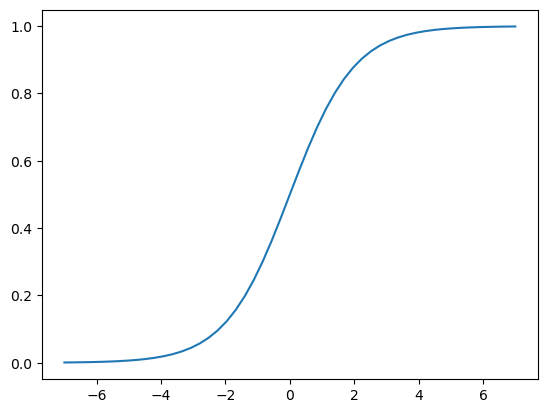

In [136]:
plt.plot(z, sigmoid(z))

## 3.12 Using the model 

In [167]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [140]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [142]:
y_full_train = df_full_train.churn.values

In [143]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [171]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [154]:
X_test = dv.transform(dicts_test)
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.10000e+01, 3.32075e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.60000e+01, 6.47185e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 5.24350e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 3.88865e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.50000e+01, 5.68845e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.70000e+01, 1.74350e+03]])

In [155]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [159]:
churn_decision = (y_pred >= 0.50).astype(int)

In [164]:
(churn_decision == y_test).mean()

0.815471965933286

In [169]:
customer = dicts_test[-1]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [173]:
X_small = dv.transform([customer])

In [174]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [181]:
y_test[10]

0